# Update PLOTLY

In [1]:
%pip install --upgrade plotly

     |████████████████████████████████| 23.9 MB 13 kB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


# Import the Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

IMPORT THE CSV 

In [199]:
df = pd.read_csv("hotel_bookings.csv")

DATA INTRO AND DATA CLEANING 

In [200]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [201]:
df.shape

(119390, 32)

In [202]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [203]:
df.isnull().values.any()

True

In [204]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [205]:
df.drop("company", axis=1, inplace=True)

In [206]:
df.drop("agent", axis=1, inplace=True)

In [207]:
df.country.fillna("NAN", inplace=True)

In [208]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          4
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [209]:
df[df["children"] == 1.00]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
13,Resort Hotel,0,18,2015,July,27,1,0,4,2,1.0,0,HB,ESP,Online TA,TA/TO,0,0,0,G,G,1,No Deposit,0,Transient,154.77,0,1,Check-Out,7/5/2015
87,Resort Hotel,1,79,2015,July,27,3,6,15,2,1.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,108.73,0,2,Canceled,4/15/2015
98,Resort Hotel,0,101,2015,July,27,3,2,5,2,1.0,0,BB,PRT,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,0,Transient,99.30,1,2,Check-Out,7/10/2015
118,Resort Hotel,0,79,2015,July,27,4,4,6,2,1.0,0,HB,PRT,Direct,Direct,0,0,0,D,D,1,No Deposit,0,Transient,149.00,0,1,Check-Out,7/14/2015
143,Resort Hotel,0,109,2015,July,28,5,2,3,2,1.0,0,BB,CN,Offline TA/TO,TA/TO,0,0,0,A,D,0,No Deposit,0,Transient,85.59,1,2,Check-Out,7/10/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119162,City Hotel,0,171,2017,August,34,22,2,7,2,1.0,0,BB,ITA,Direct,Direct,0,0,0,E,E,0,No Deposit,0,Transient,180.00,0,1,Check-Out,8/31/2017
119228,City Hotel,0,341,2017,August,35,27,2,3,2,1.0,0,BB,GBR,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,0,Transient,96.91,0,1,Check-Out,9/1/2017
119270,City Hotel,0,0,2017,August,35,29,0,3,2,1.0,0,BB,ROU,Online TA,TA/TO,0,0,0,A,D,1,No Deposit,0,Transient,135.00,0,2,Check-Out,9/1/2017
119287,City Hotel,0,167,2017,August,35,27,2,4,2,1.0,0,BB,AUT,Online TA,TA/TO,0,0,0,D,D,1,No Deposit,0,Transient,177.75,0,0,Check-Out,9/2/2017


In [210]:
df.children.fillna(0.0, inplace=True)

In [211]:
df.isnull().values.any()


False

In [212]:
df.duplicated().values.any()

True

In [213]:
df[df.duplicated() == True]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.00,0,1,Check-Out,7/3/2015
22,Resort Hotel,0,72,2015,July,27,1,2,4,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,A,A,1,No Deposit,0,Transient,84.67,0,1,Check-Out,7/7/2015
43,Resort Hotel,0,70,2015,July,27,2,2,3,2,0.0,0,HB,ROU,Direct,Direct,0,0,0,E,E,0,No Deposit,0,Transient,137.00,0,1,Check-Out,7/7/2015
138,Resort Hotel,1,5,2015,July,28,5,1,0,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,0,Transient,97.00,0,0,Canceled,7/1/2015
200,Resort Hotel,0,0,2015,July,28,7,0,1,1,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,109.80,0,3,Check-Out,7/8/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119349,City Hotel,0,186,2017,August,35,31,0,3,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,0,Transient,126.00,0,2,Check-Out,9/3/2017
119352,City Hotel,0,63,2017,August,35,31,0,3,3,0.0,0,BB,SWE,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,0,Transient-Party,195.33,0,2,Check-Out,9/3/2017
119353,City Hotel,0,63,2017,August,35,31,0,3,3,0.0,0,BB,SWE,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,0,Transient-Party,195.33,0,2,Check-Out,9/3/2017
119354,City Hotel,0,63,2017,August,35,31,0,3,3,0.0,0,BB,SWE,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,0,Transient-Party,195.33,0,2,Check-Out,9/3/2017


In [ ]:
df.drop_duplicates(inplace=True)

In [214]:
df.shape

(119390, 30)

In [215]:
filter = df[(df["adults"] == 0) & (df["children"] == 0) & (df["babies"] == 0)]
filter

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2224,Resort Hotel,0,1,2015,October,41,6,0,3,0,0.0,0,SC,PRT,Corporate,Corporate,0,0,0,A,I,1,No Deposit,0,Transient-Party,0.00,0,0,Check-Out,10/6/2015
2409,Resort Hotel,0,0,2015,October,42,12,0,0,0,0.0,0,SC,PRT,Corporate,Corporate,0,0,0,A,I,0,No Deposit,0,Transient,0.00,0,0,Check-Out,10/12/2015
3181,Resort Hotel,0,36,2015,November,47,20,1,2,0,0.0,0,SC,ESP,Groups,TA/TO,0,0,0,A,C,0,No Deposit,0,Transient-Party,0.00,0,0,Check-Out,11/23/2015
3684,Resort Hotel,0,165,2015,December,53,30,1,4,0,0.0,0,SC,PRT,Groups,TA/TO,0,0,0,A,A,1,No Deposit,122,Transient-Party,0.00,0,0,Check-Out,1/4/2016
3708,Resort Hotel,0,165,2015,December,53,30,2,4,0,0.0,0,SC,PRT,Groups,TA/TO,0,0,0,A,C,1,No Deposit,122,Transient-Party,0.00,0,0,Check-Out,1/5/2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115029,City Hotel,0,107,2017,June,26,27,0,3,0,0.0,0,BB,CHE,Online TA,TA/TO,0,0,0,A,A,1,No Deposit,0,Transient,100.80,0,0,Check-Out,6/30/2017
115091,City Hotel,0,1,2017,June,26,30,0,1,0,0.0,0,SC,PRT,Complementary,Direct,0,0,0,E,K,0,No Deposit,0,Transient,0.00,1,1,Check-Out,7/1/2017
116251,City Hotel,0,44,2017,July,28,15,1,1,0,0.0,0,SC,SWE,Online TA,TA/TO,0,0,0,A,K,2,No Deposit,0,Transient,73.80,0,0,Check-Out,7/17/2017
116534,City Hotel,0,2,2017,July,28,15,2,5,0,0.0,0,SC,RUS,Online TA,TA/TO,0,0,0,A,K,1,No Deposit,0,Transient-Party,22.86,0,1,Check-Out,7/22/2017


In [216]:
filter.index

Int64Index([  2224,   2409,   3181,   3684,   3708,   4127,   9376,  31765,
             32029,  32827,
            ...
            112558, 113188, 114583, 114908, 114911, 115029, 115091, 116251,
            116534, 117087],
           dtype='int64', length=180)

In [217]:
df.drop(filter.index, axis=0, inplace=True)
print(df.shape)

(119210, 30)


In [218]:
df[(df["stays_in_weekend_nights"] == 0) & (df["stays_in_week_nights"] == 0)] #we see that they booked without sleeping the night, they booked for few hours and left

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,7/1/2015
167,Resort Hotel,0,111,2015,July,28,6,0,0,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,H,0,No Deposit,0,Transient,0.0,0,2,Check-Out,7/6/2015
168,Resort Hotel,0,0,2015,July,28,6,0,0,1,0.0,0,BB,PRT,Direct,Direct,0,0,0,E,H,0,No Deposit,0,Transient,0.0,0,0,Check-Out,7/6/2015
196,Resort Hotel,0,8,2015,July,28,7,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,A,A,0,No Deposit,0,Transient,0.0,0,1,Check-Out,7/7/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115483,City Hotel,0,15,2017,July,27,6,0,0,1,0.0,0,SC,FRA,Direct,Direct,0,0,0,A,A,0,No Deposit,0,Transient-Party,0.0,0,0,Check-Out,7/6/2017
117701,City Hotel,0,0,2017,August,32,8,0,0,2,0.0,0,BB,PRT,Offline TA/TO,TA/TO,1,0,0,A,A,0,No Deposit,0,Transient,0.0,0,0,Check-Out,8/8/2017
118029,City Hotel,0,0,2017,August,33,14,0,0,2,0.0,0,BB,PRT,Direct,Direct,1,0,0,A,A,0,No Deposit,0,Transient,0.0,0,0,Check-Out,8/14/2017
118631,City Hotel,0,78,2017,August,34,23,0,0,1,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,K,7,No Deposit,0,Transient-Party,0.0,0,0,Check-Out,8/23/2017


In [219]:
df.reservation_status.unique()

array(['Check-Out', 'Canceled', 'No-Show'], dtype=object)

# After cleaning, separate Resort and City hotel

In [220]:
df.nunique()

hotel                                2
is_canceled                          2
lead_time                          479
arrival_date_year                    3
arrival_date_month                  12
arrival_date_week_number            53
arrival_date_day_of_month           31
stays_in_weekend_nights             17
stays_in_week_nights                33
adults                              14
children                             5
babies                               5
meal                                 5
country                            178
market_segment                       8
distribution_channel                 5
is_repeated_guest                    2
previous_cancellations              15
previous_bookings_not_canceled      73
reserved_room_type                   9
assigned_room_type                  11
booking_changes                     19
deposit_type                         3
days_in_waiting_list               127
customer_type                        4
adr                      

In [221]:
city_vs_resort = df.groupby("hotel").count()

In [222]:
city_vs_resort

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
hotel,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
City Hotel,79163,79163,79163,79163,79163,79163,79163,79163,79163,79163,79163,79163,79163,79163,79163,79163,79163,79163,79163,79163,79163,79163,79163,79163,79163,79163,79163,79163,79163
Resort Hotel,40047,40047,40047,40047,40047,40047,40047,40047,40047,40047,40047,40047,40047,40047,40047,40047,40047,40047,40047,40047,40047,40047,40047,40047,40047,40047,40047,40047,40047


In [223]:
fig = px.bar(city_vs_resort, x=city_vs_resort.index, y=city_vs_resort.is_canceled)
fig.show()

In [224]:
city = df[df["hotel"] == "City Hotel"]
resort = df[df["hotel"] == "Resort Hotel"]

# Where do the guests come from to resort hotels

In [225]:
print(resort.head())
print(resort.shape)

          hotel  is_canceled  ...  reservation_status  reservation_status_date
0  Resort Hotel            0  ...           Check-Out                 7/1/2015
1  Resort Hotel            0  ...           Check-Out                 7/1/2015
2  Resort Hotel            0  ...           Check-Out                 7/2/2015
3  Resort Hotel            0  ...           Check-Out                 7/2/2015
4  Resort Hotel            0  ...           Check-Out                 7/3/2015

[5 rows x 30 columns]
(40047, 30)


In [226]:
resort['country'].value_counts()

PRT    17622
GBR     6813
ESP     3956
IRL     2166
FRA     1610
       ...  
COM        1
SYR        1
SAU        1
BHR        1
BHS        1
Name: country, Length: 126, dtype: int64

In [227]:
visitors_by_life_cycle = resort.groupby("country")["adults", "children", "babies"].sum().sort_values(by="adults", ascending=False).head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [228]:
visitors_by_life_cycle

,adults,children,babies
country,,,
PRT,32021,2160.0,290
GBR,12926,639.0,66
ESP,7805,657.0,81
IRL,4212,218.0,22
FRA,3066,196.0,25
DEU,2147,74.0,3
CN,1401,73.0,6
NLD,955,60.0,2
USA,942,127.0,4


In [229]:
adults = visitors_by_life_cycle.adults.values
children = visitors_by_life_cycle.children.values
babies = visitors_by_life_cycle.babies.values

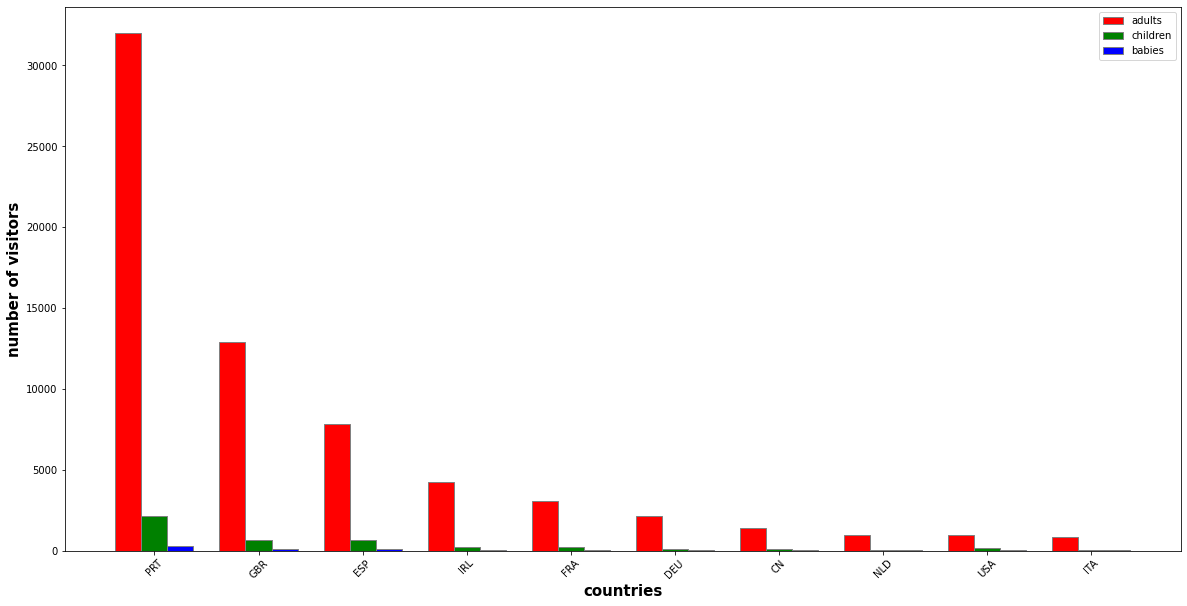

In [230]:

import numpy as np
import matplotlib.pyplot as plt
 
# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(20, 10))
 
# set height of bar
adults = visitors_by_life_cycle.adults.values
children = visitors_by_life_cycle.children.values
babies = visitors_by_life_cycle.babies.values
 
# Set position of bar on X axis
br1 = np.arange(len(adults))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
 
# Make the plot
plt.bar(br1, adults, color ='r', width = barWidth,
        edgecolor ='grey', label ='adults')
plt.bar(br2, children, color ='g', width = barWidth,
        edgecolor ='grey', label ='children')
plt.bar(br3, babies, color ='b', width = barWidth,
        edgecolor ='grey', label ='babies')
 
# Adding Xticks
plt.xlabel('countries', fontweight ='bold', fontsize = 15)
plt.ylabel('number of visitors', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(adults))],
        visitors_by_life_cycle.index, rotation=45)
 
plt.legend()
plt.show()

# How much do guests pay for a room per night?

In [231]:
df.head(2)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,7/1/2015


In [232]:
avr_price_per_room_meal_hoteltype = df.groupby(["hotel", "reserved_room_type", "meal"])["adr"].mean()
avr_price_per_room_meal_hoteltype

hotel         reserved_room_type  meal     
City Hotel    A                   BB            94.124451
                                  FB            85.027027
                                  HB           110.114243
                                  SC            99.504384
              B                   BB            90.011796
                                  HB           111.958462
                                  SC            89.618214
              C                   BB           109.275000
                                  HB           104.000000
                                  SC             0.000000
              D                   BB           130.007028
                                  FB           107.750000
                                  HB           163.079043
                                  SC           115.017286
              E                   BB           154.115436
                                  HB           189.724643
                            

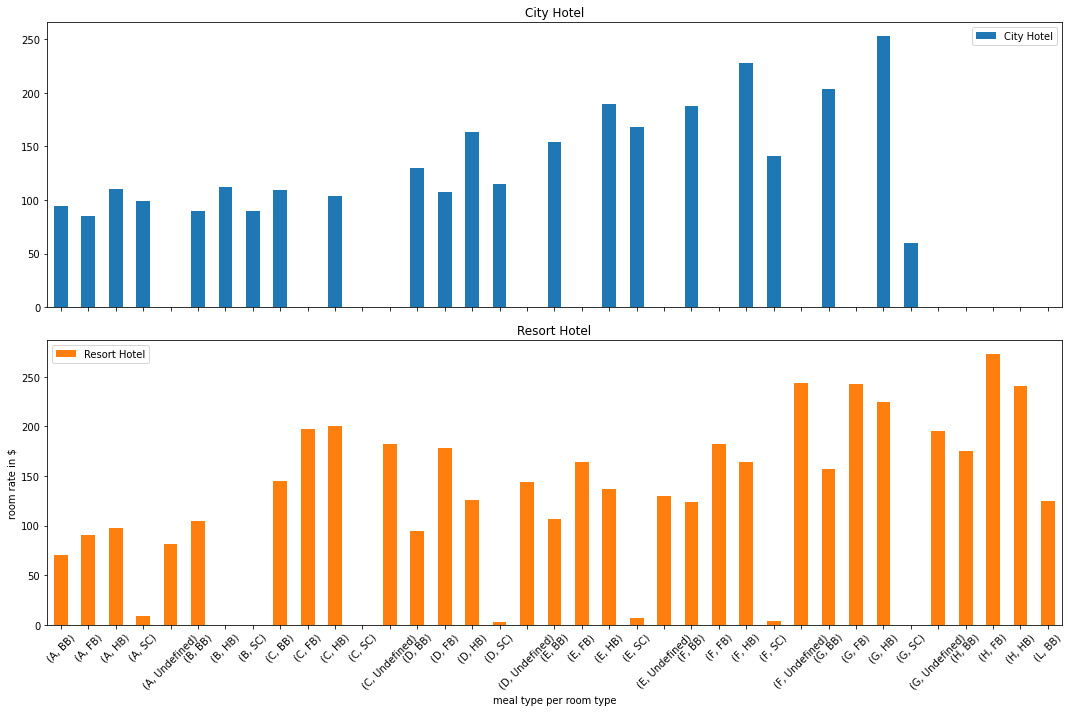

In [233]:
ax = avr_price_per_room_meal_hoteltype.unstack(level=0).plot(kind='bar', subplots=True, rot=0, figsize=(15, 10))
plt.xticks(rotation = 45)
plt.ylabel("room rate in $")
plt.xlabel("meal type per room type")
plt.xticks(rotation = 45)
plt.ylabel("room rate in $")
plt.xlabel("meal type per room type")
plt.tight_layout()

# How does the price per night vary over the days in the month?

In [234]:
resort.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [235]:
df_2 = df.copy()

In [236]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
days_in_waiting_list              

In [237]:
avrg_price_per_night_2015 = resort[resort["arrival_date_year"] == 2015].groupby("arrival_date_day_of_month").mean().sort_values(by="arrival_date_day_of_month")

In [238]:
avrg_price_per_night_2016 = resort[resort["arrival_date_year"] == 2016].groupby("arrival_date_day_of_month").mean().sort_values(by="arrival_date_day_of_month")
avrg_price_per_night_2017 = resort[resort["arrival_date_year"] == 2017].groupby("arrival_date_day_of_month").mean().sort_values(by="arrival_date_day_of_month")

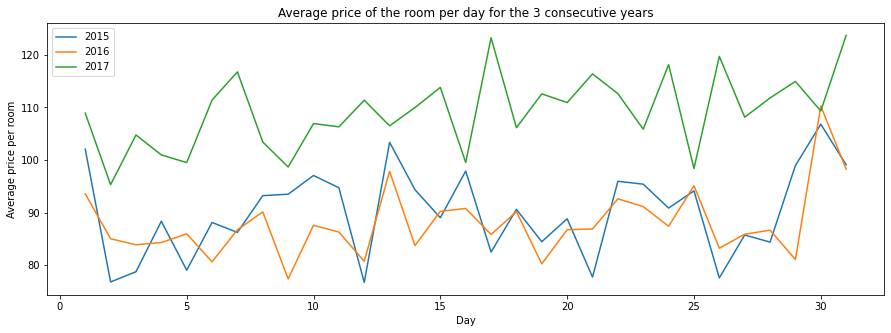

In [239]:
plt.figure(figsize=(15, 5))
# plotting the line 1 points 
plt.plot(avrg_price_per_night_2015.index, avrg_price_per_night_2015.adr, label="2015")
# plotting the line 2 points 
plt.plot(avrg_price_per_night_2016.index, avrg_price_per_night_2016.adr, label="2016")
# plotting line 3 
plt.plot(avrg_price_per_night_2017.index, avrg_price_per_night_2017.adr, label="2017")
plt.xlabel('Day')
# Set the y axis label of the current axis.
plt.ylabel('Average price per room')
# Set a title of the current axes.
plt.title('Average price of the room per day for the 3 consecutive years')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()
#https://www.hotelmanagement.net/own/2017-review
#this is why the hotels in 2017 trend changed 180 degrees than how it was in 2015, 2016

# How does the price per night vary over the year?

In [240]:
avr_price_per_month = df.groupby("arrival_date_month").mean()

In [241]:
avr_price_per_month.adr

arrival_date_month
April        100.468146
August       140.255303
December      81.321256
February      73.717054
January       70.451631
July         126.944704
June         116.761489
March         80.884282
May          108.771400
November      73.966448
October       88.011401
September    105.127290
Name: adr, dtype: float64

In [245]:
data_resort = resort[resort['is_canceled'] == 0]

In [246]:
data_city = city[city['is_canceled'] == 0]


In [247]:
price_variation_resort = data_resort.groupby("arrival_date_month")["adr"].mean().reset_index()
price_variation_resort

,arrival_date_month,adr
0,April,75.867816
1,August,181.205892
2,December,68.410104
3,February,54.147478
4,January,48.761125
5,July,150.122528
6,June,107.974850
7,March,57.056838
8,May,76.657558
9,November,48.706289


In [248]:
price_variation_city = data_city.groupby("arrival_date_month")["adr"].mean().reset_index()
price_variation_city

,arrival_date_month,adr
0,April,111.962267
1,August,118.674598
2,December,88.401855
3,February,86.520062
4,January,82.330983
5,July,115.818019
6,June,117.874360
7,March,90.658533
8,May,120.669827
9,November,86.946592


In [249]:
final = price_variation_resort.merge(price_variation_city, on="arrival_date_month")

In [250]:
final.columns=['month','price_for_resort','price_for_city_hotel']

In [251]:
final

,month,price_for_resort,price_for_city_hotel
0,April,75.867816,111.962267
1,August,181.205892,118.674598
2,December,68.410104,88.401855
3,February,54.147478,86.520062
4,January,48.761125,82.330983
5,July,150.122528,115.818019
6,June,107.974850,117.874360
7,March,57.056838,90.658533
8,May,76.657558,120.669827
9,November,48.706289,86.946592


# Distribution of Nights Spent at Hotels by Market Segment and Hotel Type


In [253]:
market_segment_resort_distrubitionpernight = data_resort[["stays_in_weekend_nights", "stays_in_week_nights", "market_segment"]].groupby("market_segment").sum()

In [258]:
market_segment_city_distrubitionpernight = data_city[["stays_in_weekend_nights", "stays_in_week_nights", "market_segment"]].groupby("market_segment").sum()

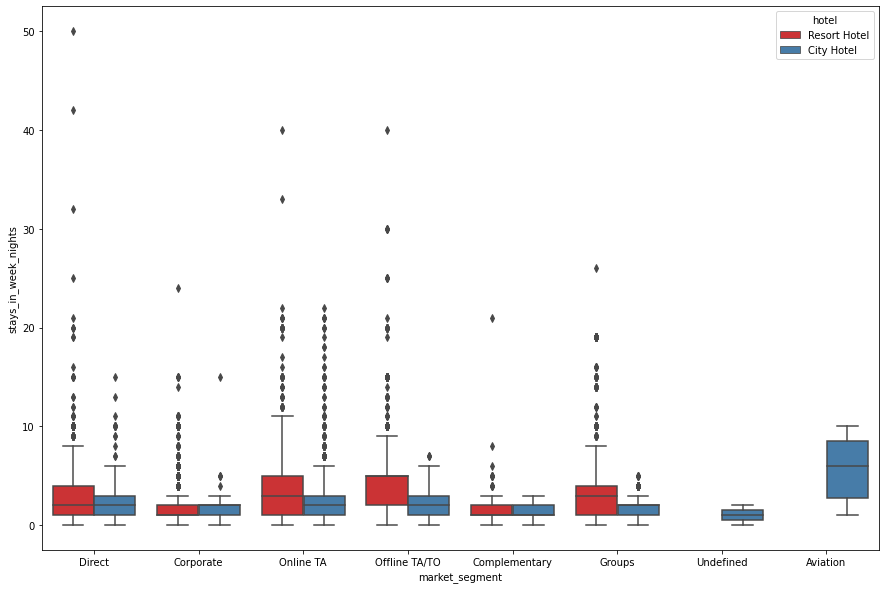

In [139]:
plt.figure(figsize = (15,10))
sns.boxplot(x = "market_segment", y = "stays_in_week_nights", data = df, hue = "hotel", palette = 'Set1');

# Analysing Preference of Guests, what they basically Prefer?

In [259]:
df.head(2)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,7/1/2015


In [261]:
df[["reserved_room_type", "meal"]].groupby("meal").count()

,reserved_room_type
meal,
BB,92236
FB,798
HB,14458
SC,10549
Undefined,1169


# Simplify your analysis on the basis of differen types of hotels & meals

In [262]:
df.groupby(["hotel", "meal"]).agg({"meal": pd.Series.count})

meal
hotel        meal            
City Hotel   BB         62233
             FB            44
             HB          6412
             SC         10474
Resort Hotel BB         30003
             FB           754
             HB          8046
             SC            75
             Undefined   1169

# Analyse Special Request done by Customers

In [263]:
df.head(2)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,7/1/2015


In [264]:
df.groupby("total_of_special_requests").count()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,reservation_status,reservation_status_date
total_of_special_requests,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,70201,70201,70201,70201,70201,70201,70201,70201,70201,70201,70201,70201,70201,70201,70201,70201,70201,70201,70201,70201,70201,70201,70201,70201,70201,70201,70201,70201,70201
1,33183,33183,33183,33183,33183,33183,33183,33183,33183,33183,33183,33183,33183,33183,33183,33183,33183,33183,33183,33183,33183,33183,33183,33183,33183,33183,33183,33183,33183
2,12952,12952,12952,12952,12952,12952,12952,12952,12952,12952,12952,12952,12952,12952,12952,12952,12952,12952,12952,12952,12952,12952,12952,12952,12952,12952,12952,12952,12952
3,2494,2494,2494,2494,2494,2494,2494,2494,2494,2494,2494,2494,2494,2494,2494,2494,2494,2494,2494,2494,2494,2494,2494,2494,2494,2494,2494,2494,2494
4,340,340,340,340,340,340,340,340,340,340,340,340,340,340,340,340,340,340,340,340,340,340,340,340,340,340,340,340,340
5,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40


<BarContainer object of 6 artists>

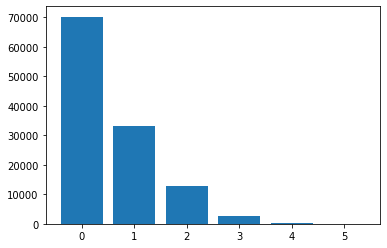

In [265]:
plt.bar(df.groupby("total_of_special_requests").count().index, height=df.groupby("total_of_special_requests").count().hotel)

# Special request analysis with number of cancellation

In [266]:
df.groupby(["total_of_special_requests", "is_canceled"]).agg({"is_canceled": pd.Series.count})

is_canceled
total_of_special_requests is_canceled             
0                         0                  36667
                          1                  33534
1                         0                  25867
                          1                   7316
2                         0                  10086
                          1                   2866
3                         0                   2049
                          1                    445
4                         0                    304
                          1                     36
5                         0                     38
                          1                      2

# Which are the most busy month or in which months Guests are high?

In [278]:
busy_resort = data_resort.groupby("arrival_date_month")["hotel"].count().reset_index()

In [279]:
busy_city = data_city.groupby("arrival_date_month")["hotel"].count().reset_index()

In [280]:
result = busy_resort.merge(busy_city, on="arrival_date_month")

In [282]:
result.columns = ["month", "Resort Visitor", "Hotel Visitor"]

In [284]:
result

,month,Resort Visitor,Hotel Visitor
0,April,2550,4010
1,August,3257,5367
2,December,2014,2377
3,February,2308,3051
4,January,1866,2249
5,July,3137,4770
6,June,2037,4358
7,March,2571,4049
8,May,2535,4568
9,November,1975,2676


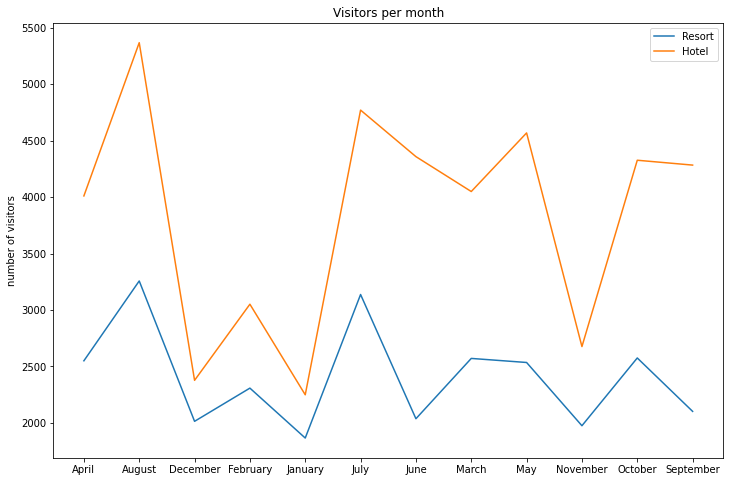

In [291]:
plt.figure(figsize=(12, 8))
plt.plot(result.month, result["Resort Visitor"], label="Resort")
plt.plot(result.month, result["Hotel Visitor"], label="Hotel")
plt.ylabel("number of visitors")
plt.title("Visitors per month")
plt.legend()

# How long do people stay at the hotels?

In [292]:
df["total_days_of_stay"] = df['stays_in_week_nights'] + df['stays_in_weekend_nights']

In [311]:
days_stayed_in_hotel = df[(df["hotel"] == "City Hotel") & (df["is_canceled"] == 0)].groupby("total_days_of_stay").count().hotel.reset_index()

# How long do people stay at the resort?

In [312]:
days_stayed_in_resort = df[(df["hotel"] == "Resort Hotel") & (df["is_canceled"] == 0)].groupby("total_days_of_stay").count().hotel.reset_index()

# PLOT THE STAYS 

In [315]:
slept_nights = days_stayed_in_resort.merge(days_stayed_in_hotel, on="total_days_of_stay")
slept_nights.columns = ["days_visited", "Resort", "Hotel"]

In [316]:
slept_nights

,days_visited,Resort,Hotel
0,0,371,251
1,1,6579,9155
2,2,4488,10983
3,3,3828,11889
4,4,3321,7694
5,5,1899,3210
6,6,1205,1111
7,7,4434,1245
8,8,509,205
9,9,408,119


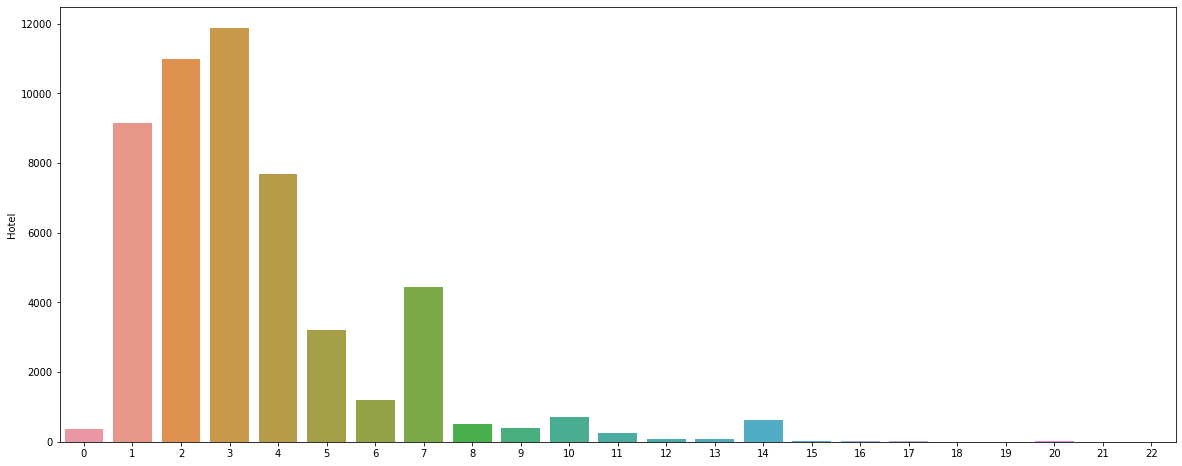

In [320]:
plt.figure(figsize=(20, 8))
sns.barplot(x =slept_nights.index, y = "Resort", data=slept_nights)

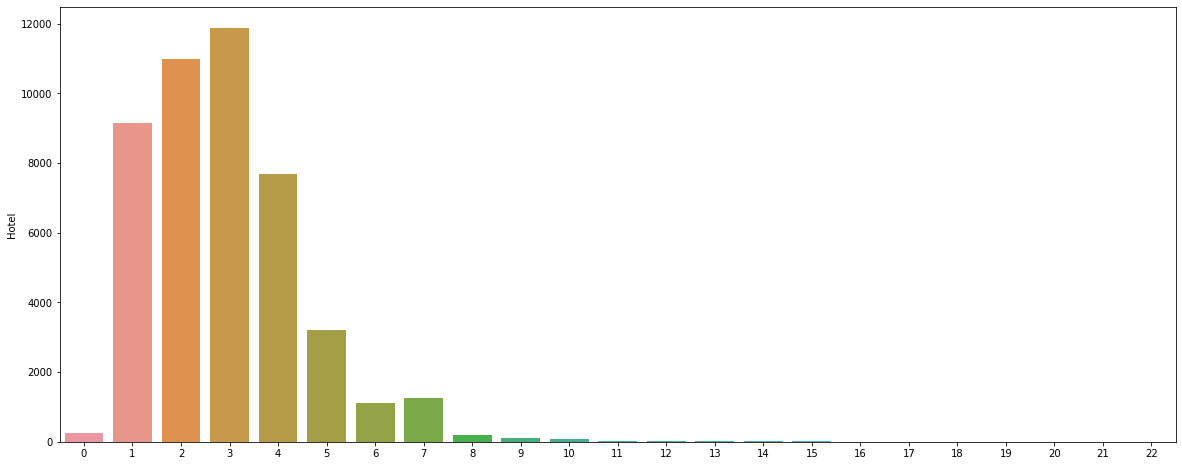

In [321]:
plt.figure(figsize=(20, 8))
sns.barplot(x =slept_nights.index, y = "Hotel", data=slept_nights)

# Which month have the highest number of cancellations?

In [334]:
canceled_bookings_by_month = df[df['is_canceled'] == 1].groupby(["hotel", "arrival_date_month"])["is_canceled"].count().reset_index()

In [335]:
canceled_bookings_by_month

,hotel,arrival_date_month,is_canceled
0,City Hotel,April,3459
1,City Hotel,August,3600
2,City Hotel,December,1737
3,City Hotel,February,1899
4,City Hotel,January,1481
5,City Hotel,July,3301
6,City Hotel,June,3527
7,City Hotel,March,2385
8,City Hotel,May,3653
9,City Hotel,November,1660


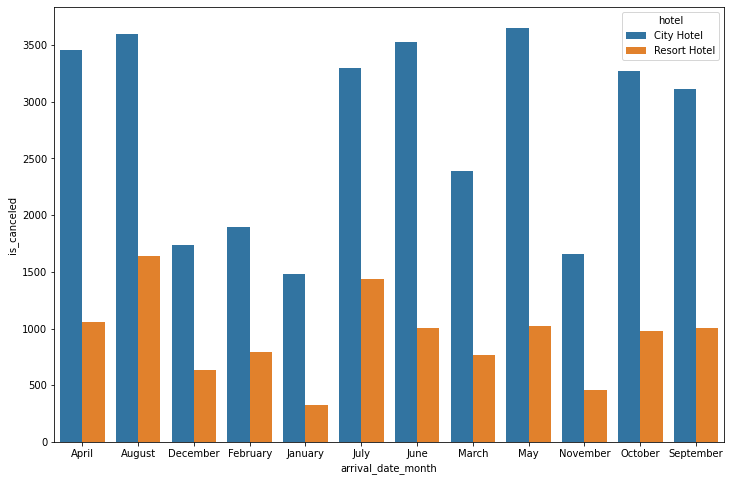

In [339]:
plt.figure(figsize=(12, 8))
sns.barplot(x=canceled_bookings_by_month.arrival_date_month,
            y=canceled_bookings_by_month.is_canceled,
            hue=canceled_bookings_by_month.hotel,
            data=canceled_bookings_by_month)